In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Irisdataset.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


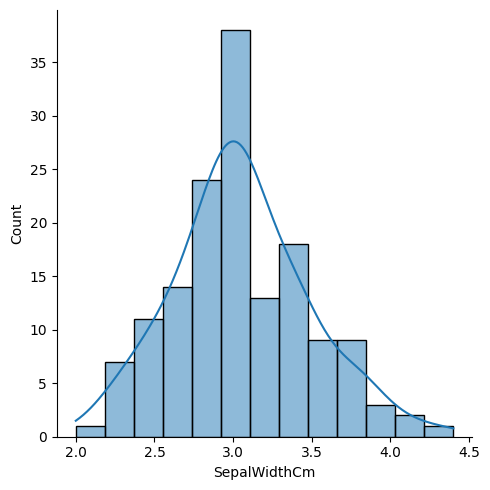

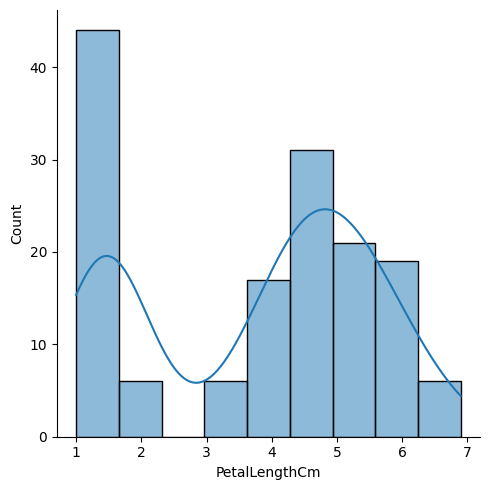

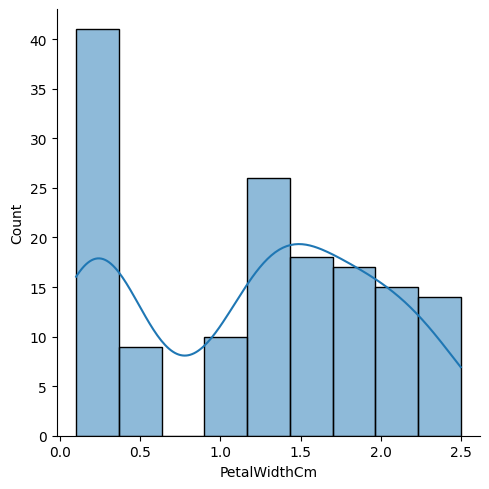

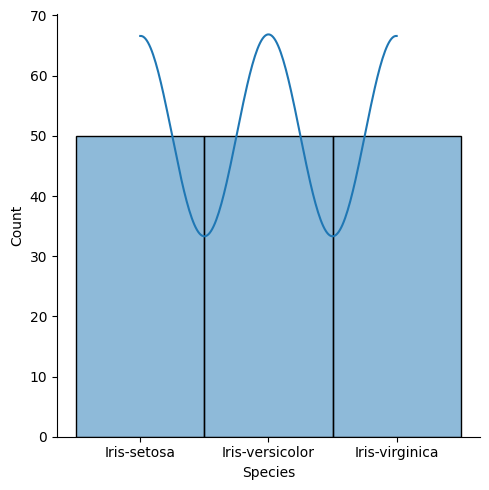

In [6]:
for features in data.columns[2:]:
  sns.displot(data[features], kde=True)

Performing label encoding on Species

In [7]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Species']=label.fit_transform(data['Species'])

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
dict(zip(label.classes_, label.transform(label.classes_)))

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [10]:
data['Species'].value_counts()

,count
Species,
0,50
1,50
2,50


Splitting the data for trainig and testing

In [11]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
X = data.drop(['Id','Species'],axis=1)
y = data['Species']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [14]:
x_train.shape

(105, 4)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [65]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_train[:10]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [18]:
X_train.shape[-1]

4

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[-1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 9s - 2s/step - accuracy: 0.3810 - loss: 1.1386
Epoch 2/100
4/4 - 0s - 27ms/step - accuracy: 0.4286 - loss: 1.0874
Epoch 3/100
4/4 - 0s - 29ms/step - accuracy: 0.5429 - loss: 0.9880
Epoch 4/100
4/4 - 0s - 34ms/step - accuracy: 0.5905 - loss: 0.9430
Epoch 5/100
4/4 - 0s - 35ms/step - accuracy: 0.6095 - loss: 0.9097
Epoch 6/100
4/4 - 0s - 23ms/step - accuracy: 0.6857 - loss: 0.8652
Epoch 7/100
4/4 - 0s - 22ms/step - accuracy: 0.7143 - loss: 0.8704
Epoch 8/100
4/4 - 0s - 25ms/step - accuracy: 0.7905 - loss: 0.7554
Epoch 9/100
4/4 - 0s - 25ms/step - accuracy: 0.7810 - loss: 0.7418
Epoch 10/100
4/4 - 0s - 27ms/step - accuracy: 0.8095 - loss: 0.7304
Epoch 11/100
4/4 - 0s - 39ms/step - accuracy: 0.8000 - loss: 0.7148
Epoch 12/100
4/4 - 0s - 26ms/step - accuracy: 0.7714 - loss: 0.6912
Epoch 13/100
4/4 - 0s - 33ms/step - accuracy: 0.8286 - loss: 0.6645
Epoch 14/100
4/4 - 0s - 26ms/step - accuracy: 0.8190 - loss: 0.6478
Epoch 15/100
4/4 - 0s - 28ms/step - accuracy: 0.7905 - loss

In [23]:
prediction = model.predict(X_test)
prediction

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


array([[9.99721467e-01, 2.77540996e-04, 9.97151346e-07],
       [1.48047060e-02, 9.33779478e-01, 5.14158607e-02],
       [9.98314738e-01, 1.67340727e-03, 1.18548323e-05],
       [1.83966637e-04, 4.07699496e-03, 9.95739102e-01],
       [9.97458756e-01, 2.51773139e-03, 2.35224179e-05],
       [9.99888420e-01, 1.11174435e-04, 3.35391093e-07],
       [2.16934253e-02, 9.33695197e-01, 4.46114875e-02],
       [3.25634668e-04, 1.28362803e-02, 9.86838043e-01],
       [4.63784579e-03, 3.48205000e-01, 6.47157192e-01],
       [9.99935031e-01, 6.48120986e-05, 1.41057185e-07],
       [1.31958467e-03, 7.50901878e-01, 2.47778490e-01],
       [9.56059594e-05, 7.93963764e-03, 9.91964698e-01],
       [9.99223828e-01, 7.73317181e-04, 2.81098164e-06],
       [1.99838370e-01, 6.75539434e-01, 1.24622203e-01],
       [3.36865080e-04, 8.03105533e-03, 9.91632044e-01],
       [1.69023760e-02, 9.33121026e-01, 4.99765053e-02],
       [7.86809064e-03, 9.86482263e-01, 5.64966025e-03],
       [2.67787138e-04, 5.63820

In [24]:
prediction = np.argmax(prediction, axis=1)
prediction

array([0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0,
       1])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy Score : ", accuracy_score(y_test, prediction))
print("_"*100)
print()
print("Confusion matrix : \n", confusion_matrix(y_test, prediction))

Accuracy Score :  0.9777777777777777
____________________________________________________________________________________________________

Confusion matrix : 
 [[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


In [26]:
cm = confusion_matrix(y_test, prediction)

In [27]:
species_name = label.classes_

Text(50.72222222222221, 0.5, 'actual')

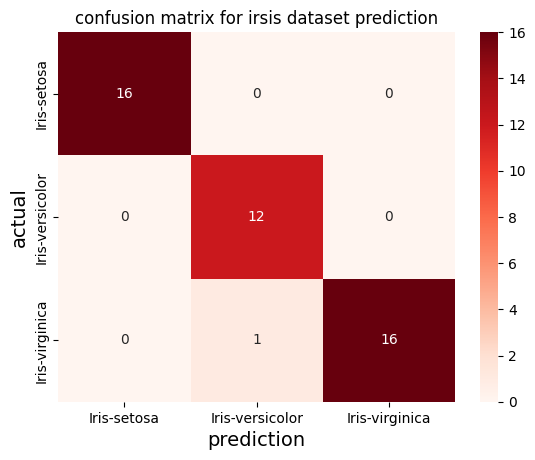

In [28]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)

## Hyperparameter Tuning

In [33]:
#pip install keras-tuner
#!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [34]:
import keras_tuner as kt

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [39]:
# 1. Define the model-building function with tunable hyperparameters
def build_model(hp):
    model = Sequential()

    # Tune the number of units in the first Dense layer
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))

    # Tune the number of units in the second Dense layer
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                    activation='relu'))

    # Add Dropout layer and tune the dropout rate
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.7, step=0.1)))

    # Output layer with softmax for 3 classes
    model.add(Dense(units=3, activation='softmax'))

    # Compile the model with Adam optimizer and tune the learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [40]:
## 2. Set up the Hyperparameter Tuner
tuner = kt.RandomSearch(
    build_model,  # The function that defines the model
    objective='val_accuracy',  # The metric to optimize (validation accuracy)
    max_trials=5,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train for each trial
    directory='my_dir',  # Directory to save the results
    project_name='hyperparameter_tuning'  # Name of the project
)

In [44]:
# 3. Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=2)

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.6666666865348816

Best val_accuracy So Far: 0.9523809552192688
Total elapsed time: 00h 01m 34s


In [51]:
# 4. Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [52]:
print("Best Hyperparameters:", best_hyperparameters.values)

Best Hyperparameters: {'units_1': 128, 'units_2': 128, 'dropout': 0.5, 'learning_rate': 0.0029110238976895516}


In [67]:
# Evaluate the best model on the test data
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
best_model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.9748 - loss: 0.1150


[0.10216233134269714, 0.9777777791023254]

In [53]:
# Optionally, train the best model for more epochs
best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=2)


Epoch 1/50
3/3 - 5s - 2s/step - accuracy: 0.8452 - loss: 0.2842 - val_accuracy: 0.9048 - val_loss: 0.3334
Epoch 2/50
3/3 - 0s - 26ms/step - accuracy: 0.8571 - loss: 0.2339 - val_accuracy: 0.9048 - val_loss: 0.3350
Epoch 3/50
3/3 - 0s - 22ms/step - accuracy: 0.8929 - loss: 0.2421 - val_accuracy: 0.9524 - val_loss: 0.3310
Epoch 4/50
3/3 - 0s - 46ms/step - accuracy: 0.9286 - loss: 0.2149 - val_accuracy: 0.9524 - val_loss: 0.3328
Epoch 5/50
3/3 - 0s - 23ms/step - accuracy: 0.9167 - loss: 0.2250 - val_accuracy: 0.9524 - val_loss: 0.3238
Epoch 6/50
3/3 - 0s - 46ms/step - accuracy: 0.9405 - loss: 0.1800 - val_accuracy: 0.9524 - val_loss: 0.3251
Epoch 7/50
3/3 - 0s - 45ms/step - accuracy: 0.9048 - loss: 0.2046 - val_accuracy: 0.9524 - val_loss: 0.3299
Epoch 8/50
3/3 - 0s - 23ms/step - accuracy: 0.9405 - loss: 0.1636 - val_accuracy: 0.9524 - val_loss: 0.3215
Epoch 9/50
3/3 - 0s - 48ms/step - accuracy: 0.9524 - loss: 0.1610 - val_accuracy: 0.9524 - val_loss: 0.3186
Epoch 10/50
3/3 - 0s - 45ms/st

In [56]:
# Evaluate the best model on the test data
prediction = best_model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [57]:
prediction = np.argmax(prediction, axis=1)
prediction

array([0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0,
       1])

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy Score : ", accuracy_score(y_test, prediction))
print("_"*100)
print()
print("Confusion matrix : \n", confusion_matrix(y_test, prediction))

Accuracy Score :  0.9777777777777777
____________________________________________________________________________________________________

Confusion matrix : 
 [[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]
